# Estimate of aleatoric uncertainty by estimation of maximum likelihood: theory and application with Tensorflow probability

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vtaquet/data-science-tutorials/2-data-sampling-distributions/aleatoric-uncertainty-tfp.ipynb)


## 1. Theory

### Mass function and probability density function

Any probability distribution has a mass function (if the distribution is discreet) or a probability density function (if the distribution is continuous). This function indicates the probability that a sample will take a particular value. Let us find this function $P(y | \theta)$ where $y$ is the value of our sample and $\theta$ is the parameter that describes the probability distribution:

$$
P(y | \theta) = \text{Prob} (\text{sampling value $y$ from a distribution with parameter $\theta$}).
$$

When several samples are drawn *independently* from the same distribution (which is a common hypothesis), the mass function or density of the sampled values $y_1, \ldots, y_n$ is the product of the mass or density functions of each individual $y_i$, which gives:

$$
P(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n P(y_i | \theta).
$$

### The likelihood function

The probability density functions are usually considered as functions of $y_1, \ldots, y_n$, with the parameter $\theta$ considered fixed. They are thus used when you know the $\theta$ parameter and you want to obtain the probability of a sample taking the values ​​$y_1, \ldots, y_n$. This function is commonly used in *probability* when the distribution is known and that we want to deduct the sampled values ​​of this distribution.

Conversely, for the *likelihood function* the values ​​$y_1, \ldots, y_n$ are considered fixed and $\theta$ is the independent variable. This function is thus used when the sampled values ​​$y_1, \ldots, y_n$ are known (from collected data) with the parameter $\theta$ unknown. This function is thus used in *statistics* when the data is known and that we wish to carry out inferences on the original distribution.

Thus, $P(y_1, \ldots, y_n | \theta)$ is called the *probability density function* when it is function of $y_1, \ldots, y_n$ and that $\theta$ is fixed. It is called *likelihood* when it is a function of $\ theta$ with $y_1, \ldots, y_n$ fixed and is denoted $L$ where

$$
\underbrace{L(y_1, \ldots, y_n | \theta)}_{\text{ likelihood,} \\ \text{function of $\theta$}} = \underbrace{P(y_1, \ldots, y_n | \theta)}_{\text{probabiliy mass/density,} \\ \text{ function of $y_1, \ldots, y_n$}}
$$


### Bernoulli distribution

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) is the distribution that a random variable takes the value equal to 1 with a probability $\theta$ and equal to 0 with a probability of $1 - \theta$. Let $p(y | \theta)$ the probability that an event returns the value $y$ given a parameter $\theta$.
Let $P(y | \theta)$ be the probability that the event returns value $y$ given parameter $\theta$, then

$$
L(y | \theta) = P(y | \theta) = 1 - \theta \quad \text{if } \, y = 0 \\
= \theta \quad \quad \, \, \, \text{if } \, y = 1 \\
 \\
= (1 - \theta)^{1 - y} \theta^y \quad \text{if } \, y \in \{0, 1\}
$$

If the samples are independent, then we get
$$
L(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n (1 - \theta)^{1 - y_i} \theta^{y_i}.
$$

Thus, the probability of observing $0, 0, 0, 1, 0$ is

$$
L(0, 0, 0, 1, 0 | \theta) = (1 - \theta)(1 - \theta)(1 - \theta)\theta(1 - \theta) = \theta(1 - \theta)^4.
$$

Here, the data is therefore fixed and the function of *likelihood* depends on $\theta$ as shown in the figure below.

![bernouilli_distrib](figures/bernoulli_likelihood.png)

### Normal or Gaussian distribution

This idea extends also naturally to [normal distribution](https://en.wikipedia.org/wiki/normal_distribution). This distribution has two parameters: the mean $\mu$ and the standard deviation $\sigma$ .So we have $\theta = (\mu, \sigma)$.The probability density function is therefore

$$
L(y | \theta) = P(y | \theta) = P(y | \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{1}{2 \sigma^2} (y - \mu)^2 \Big).
$$

For a sequence of independent observations $y_1, \ldots, y_n$, the likelihood is

$$
L(y_1, \ldots, y_n | \mu, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{1}{2 \sigma^2} (y_i - \mu)^2 \Big).
$$

The likelihood is therefore identical, but seen as a function of $\mu$ and $\sigma$ with $y_1, \ldots, y_n$ seen as constant. For example, if the data observed is -1, 0, 1, the likelihood becomes

$$
L(-1, 0, 1 | \mu, \sigma) = (2 \pi \sigma^2)^{-3/2} \exp \Big( - \frac{1}{2 \sigma^2} [ (\mu-1)^2 + (\mu)^2 + (\mu+1)^2 ] \Big).
$$

that we can trace as a function of $\mu$ and $\sigma$ as follows

![normal_distrib](figures/gaussian_likelihood.png)

### Estimation of the maximum likelihood

The likelihood function is commonly used in statistical inference to fit a distribution to data as follows. Suppose we have observed data $y_1, \ldots, y_n$ which follow a distribution with an unknown parameter $\theta$ that we want to estimate. The likelihood is therefore

$$
L(y_1, \ldots, y_n | \theta).
$$

The maximum likelihood estimate $\theta_{\text{MLE}}$ is thus the value that maximizes the likelihood $L(y_1, \ldots, y_n | \theta)$. For the previous example of the Bernoulli distribution with the data observed 0, 0, 0, 1, 0, this gives us $P = \frac{1}{5}$, which is the maximum value of the curve above. For the normal distribution with the data observed -1, 0, 1, the maximum likelihood is given by the area around $\mu = 0, \sigma = \sqrt{\frac{2}{3}}$.Thus, we seek *the parameter values ​​that make the most plausible observed data*. Mathematically,

$$
\theta_{\text{MLE}} = \arg \max_{\theta} L(y_1, \ldots, y_n | \theta).
$$

### The negative log likelihood


For independent observations, the likelihood becomes a product

$$
L(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n L(y_i | \theta).
$$

The $\log$ function being strictly increasing, maximizing the likelihood amounts to maximizing the log-likelihood set $\log L (y_1, \ldots, y_n | \theta) $.The above product therefore becomes a sum:

$$
\begin{align}
\theta_{\text{MLE}} &= \arg \max_{\theta} L(y_1, \ldots, y_n | \theta) \\
&= \arg \max_{\theta} \log L(y_1, \ldots, y_n | \theta) \\
&= \arg \max_{\theta} \log \prod_{i=1}^n L(y_i | \theta) \\
\theta_{\text{MLE}} &= \arg \max_{\theta} \sum_{i=1}^n \log L(y_i | \theta) \\
\theta_{\text{MLE}} &= \arg \min_{\theta} \sum_{i=1}^n - \log L(y_i | \theta).
\end{align}
$$

The convention in optimization is to always minimize a function instead of maximizing it. Thus, maximizing the likelihood amounts to minimizing the negative log-likelhood (or NLL):

$$
\theta_{\text{MLE}} = \arg \min_{\theta} \text{NLL}(y_1, \ldots, y_n | \theta)
$$

where the NLL is defined as
$$
\text{NLL}(y_1, \ldots, y_n | \theta) = - \sum_{i=1}^n \log L(y_i | \theta).
$$

### Training neural networks

This method can apply to train neural networks by choosing the network weights which maximize the likelihood (or rather which minimizes negative log-likelihood) of observing training data .The neural network can be seen as a function which attributes a point $x_i$ to the parameter $\theta$ of a distribution. This parameter indicates the probability of seeing each label possible. True labels and likelihood are used to find the best weights of the neural network.

Let a neural network $\text{nn}$ with weights $\mathbf{w}$. Let $x_i$ one point of data, for example an image to classify or a vector $x$ for which we want to predict the value $y$. The prediction of the neural network $\hat{y}_i$ is

$$
\hat{y}_i = \text{NN}(x_i | \mathbf{w}).
$$
We can thus train the neural network (and determine its weights $\mathbf{w}$) as follows.
Let us assume that the neural network prediction $\hat{y}_i$ is part of a distribution from which the real label is drawn. Let us assume that we have training data made up of entries and associated labels. Let the data $x_i$ and the labels $y_i$ for $i = 1, \ ldots, n$, where $n$ is the number of training samples. Training data is therefore

$$
\text{training data} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$
For each point $x_i$, we have the prediction of the network $\hat{y}_i = \text{NN}(x_i | \mathbf{w})$, which specifies a distribution. We also have the real $y_i$ label. The weights of the trained neural network are therefore those that minimize the negative log-likelihood:

$$
\mathbf{w}^* = \arg \min_{\mathbf{w}} \big( - \sum_{i=1}^n \log L(y_i | \hat{y}_i) \big) \\
= \arg \min_{\mathbf{w}} \big( - \sum_{i=1}^n \log L(y_i | \text{NN}(x_i | \mathbf{w})) \big)
$$

In practice, determining the true optimum $\mathbf{w}^*$ is not alaways possible. Instead, an approximated value is searched with a stochastic gradient descent, usually through a $backpropagation$ of derivatives and an optimisation algorithm such as `RMSprop` or `Adam`.

The appendix presents a more concrete example of regression showing that the minimization of the negative log-likelihood is equivalent to a regression of least squares when one supports a term of Gaussian error of constant variance.

## Normal distribution: least square regression

The idea presented above can also apply for a regression problem .We have a value $x_i$ and we seek to predict the associated value $y_i$ via a neural network which gives a prediction $\hat{y}_i$:

$$
\hat{y}_i = \text{NN}(x_i | \mathbf{w}).
$$

Let us take the example of a linear regression with the following data.

![image.png](figures/linear_regression.png)

It is not possible to place a straight line that passes through each point. In addition, even points with similarvalues $x$ may not have the same values ​​of $y$. We can thus interpret this problem as $y$ being linearly connected to $x$ with additional noise:

$$
y_i = f(x_i) + \epsilon_i \quad \quad  \epsilon_i \sim N(0, \sigma^2)
$$

where $f$ is a function that we seek to determine and $\epsilon_i$ is Gaussian noise with an mean of 0 and a variance $\sigma^2$. In Deep Learning, we can approximate $f(x_i)$ by a neural network $\text{NN}(x_i | \mathbf{w})$ having weights $mathbf{w}$ and outputs $\hat{y}_i$.

$$
\hat{y}_i = \text{NN}(x_i | \mathbf{w}) = f(x_i)
$$

Under this hypothesis, we therefore have

$$
\epsilon_i = y_i - \hat{y}_i \sim N(0, \sigma^2)
$$

And thus, given training data $\{(x_1, y_1), \ldots, (x_n, y_n)\}$, we obtain negative log-likelihood (assuming the independence of noise terms)::

$$
\text{NLL}((x_1, y_1), \ldots, (x_n, y_n) | \mathbf{w}) = - \sum_{i=1}^n \log L(y_i | \hat{y}_i) \\
\text{NLL}((x_1, y_1), \ldots, (x_n, y_n) | \mathbf{w}) = - \sum_{i=1}^n \log \Big( \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big( - \frac{1}{2\sigma^2} (\hat{y}_i - y_i)^2 \Big) \Big) \\
\text{NLL}((x_1, y_1), \ldots, (x_n, y_n) | \mathbf{w}) = \frac{n}{2} \log (2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^n (\hat{y}_i - y_i)^2 \\
\text{NLL}((x_1, y_1), \ldots, (x_n, y_n) | \mathbf{w}) = \frac{n}{2} \log (2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^n (\text{NN}(x_i | \mathbf{w}) - y_i)^2.
$$

Since the last term only include weights, minimizing the negative log-likelihood is equivalent to minimizing

$$
\sum_{i=1}^n (\text{NN}(x_i | \mathbf{w}) - y_i)^2
$$

Which is equivalent to the sum of the square errors. Thus, least square regression (where the training of a network of neurons by the *Mean Squared Error*) amounts to training a neural network to reproduce the expected output value via the minimization of the negative log-likelihood assuming a term of Gaussian error of constant variance.

## 2. Application with Tensorflow

### Import of libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow_probability as tfp
import warnings

tfd = tfp.distributions
tfpl = tfp.layers

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


### Linear regression

In this first example, let us seek to reproduce the noisy linear function
$$ y_i = x_i + \frac{3}{10}\epsilon_i$$
where $\epsilon_i \sim N(0, 1)$ is $i.i.d.$ (independent and identically distributed).

Let's start by generating and visualizing this noisy function.

In [3]:
np.random.seed(59)
X_train = np.linspace(-1, 1, 100)[:, np.newaxis]
y_train = X_train + 0.3*np.random.randn(100)[:, np.newaxis]

In [4]:
model_determ = Sequential([
    Dense(units=1, input_shape=(1,))
])
model_determ.compile(
    loss="mean_squared_error",
    optimizer=RMSprop()
)

In [5]:
model_determ.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2425
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2894
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 2.4813
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 2.3340
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2040
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 2.1945
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 2.1300
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2011
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2335
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 2.1884
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2161
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2304
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

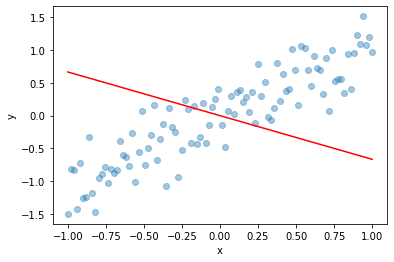

In [6]:
# Create and plot 100 points of training data
plt.scatter(X_train, y_train, alpha=0.4)
plt.plot(X_train, model_determ.predict(X_train), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

A network of classic "deterministic" neurons would return only one value at output via a dense layer to a neuron.Here we build a "probabilistic" network having a normal distribution type layer as an output layer to directly estimate the variance of training data via two methods:
- Option *Low-Level *: Include a lambda distribution type layer considering an independent normal distribution (via `tfd.Independent` and `tfd.Normal`).
- Option *High-Level *: directly include an independent normal layer `tfpl.IndepdentNormal`

In both cases, this layer has two parameters (the average and the standard deviation) and gives a normal distribution at output instead of a discreet value for a deterministic network.

In [7]:
# Probabilistic NN using DistributionLambda:
# Two-layers NLP: 
# - 1st layer has no activation function to provide next layer with any real value
# - 2nd layer has two parameters loc: mean, scale: standard-deviation > 0 hence softplus
model_w_distributionlambda = Sequential([
    Dense(units=2, input_shape=(1,)),  
    tfpl.DistributionLambda(
        lambda t: tfd.Independent(
            tfd.Normal(
                loc=t[...,:1], scale=tf.math.softplus(t[...,1:]) 
            )
        )
    )
])

In [8]:
model_w_distributionlambda.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
distribution_lambda (Distrib multiple                  0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_w_independentnormal = Sequential([
    Dense(units=2, input_shape=(1,)),
    tfpl.IndependentNormal(1)
])

In [10]:
# Probabilistic NN using IndependentNormal:
# - 1st layer has number of neurons = number of params of IndependentNormal layer
# - 2nd layer has an event_shape (= output dimensions) of 1 so two parameters
model_w_independentnormal = Sequential([
    Dense(
        units=tfpl.IndependentNormal.params_size(1),
        input_shape=(1,)
    ),
    tfpl.IndependentNormal(1)
])

In [11]:
model_w_independentnormal.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 4         
_________________________________________________________________
independent_normal_1 (Indepe multiple                  0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


**Definition of the negative log-likelihood function used for optimization.**

In [12]:
def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [13]:
model_w_independentnormal.compile(
    loss=negative_log_likelihood,
    optimizer=RMSprop(learning_rate=0.005)
)

In [14]:
model_w_independentnormal.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6623
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6257
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6354
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6296
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5980
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5713
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5888
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5583
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5508
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5289
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5035
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5133
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

In [15]:
y_model = model_w_independentnormal(X_train)
y_hat = y_model.mean()
y_std = y_model.stddev()

In [16]:
# Train model using the negative loglikelihood with the two methods
model_w_distributionlambda.compile(loss=negative_log_likelihood, optimizer=RMSprop(learning_rate=0.005))
model_w_distributionlambda.fit(X_train, y_train, epochs=200, verbose=False)

model_w_independentnormal.compile(loss=negative_log_likelihood, optimizer=RMSprop(learning_rate=0.005))
model_w_independentnormal.fit(X_train, y_train, epochs=200, verbose=False)

In [17]:
def plot_model(
    x_train, y_train, y_sample=None, y_hat=None, y_sd=None
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
    ax1.set_xlabel('x') ; ax1.set_ylabel('y')
    ax1.scatter(x_train, y_train, alpha=0.2, label='data')
    if y_sample is not None:
        ax1.scatter(x_train, y_sample, alpha=0.2, color='red', label='model sample')
    ax1.legend()
    ax2.set_xlabel('x') ; ax2.set_ylabel('y')
    if y_hat is not None:
        ax2.plot(x_train, y_hat, color='red', alpha=0.8) # , label='model $\mu$')
        ax2.fill_between(x_train.ravel(), 
                         y_hat.numpy().ravel()-2*y_sd.numpy().ravel(), 
                         y_hat.numpy().ravel()+2*y_sd.numpy().ravel(), color='green', alpha=0.2)
    ax2.scatter(x_train, y_train, alpha=0.4, label='data')
    ax2.legend(["$\mu_{hat}$", "$\mu_{hat} \pm \mu_{std}$", "Data"])
    plt.show()

**Visualisation of the inferred mean and standard deviation.**

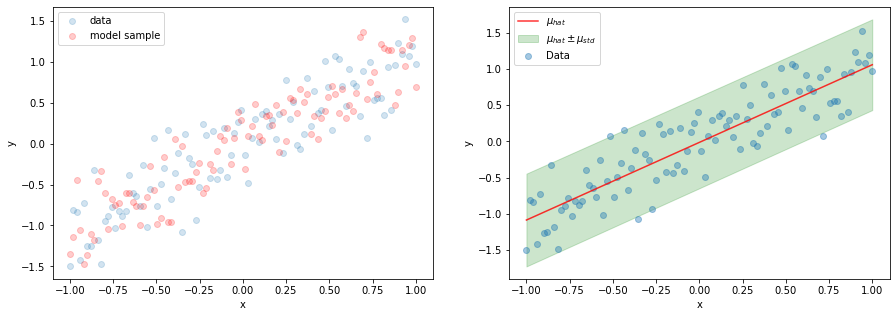

In [18]:
# Plot the data and a sample from the model
y_model = model_w_independentnormal(X_train)
y_sample = y_model.sample()
y_hat = y_model.mean()
y_std = y_model.stddev()
plot_model(X_train, y_train, y_sample, y_hat, y_std)

### Non-linear average and standard deviation

Let us now seek to reproduce a non-linear function with a noise generated by a normal distribution whose average and standard deviation evolve with $X$:
$$ y_i = x_i^3 + \frac{1}{10}(2 + x_i)\epsilon_i$$
where $\epsilon_i \sim N(0, 1)$ are iid.

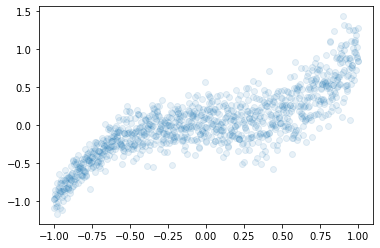

In [19]:
# 1000 data points
X_train = np.linspace(-1, 1, 1000)[:, np.newaxis]
y_train = np.power(X_train, 3) + 0.1*(2+X_train)*np.random.randn(1000)[:, np.newaxis]

plt.scatter(X_train, y_train, alpha=0.1)
plt.show()

In [20]:
# 3-layer probabilistic NN: normal distribution with variable mean and variance
model = Sequential([
    Dense(input_shape=(1,), units=8, activation='sigmoid'),
    Dense(tfpl.IndependentNormal.params_size(event_shape=1)),
    tfpl.IndependentNormal(event_shape=1)
])
model.compile(loss=negative_log_likelihood, optimizer=RMSprop(learning_rate=0.01))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
_________________________________________________________________
independent_normal_2 (Indepe multiple                  0         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=200, verbose=False)
model.evaluate(X_train, y_train)

32/32 [==============================] - 0s 1ms/step - loss: -0.1680


-0.16798171401023865

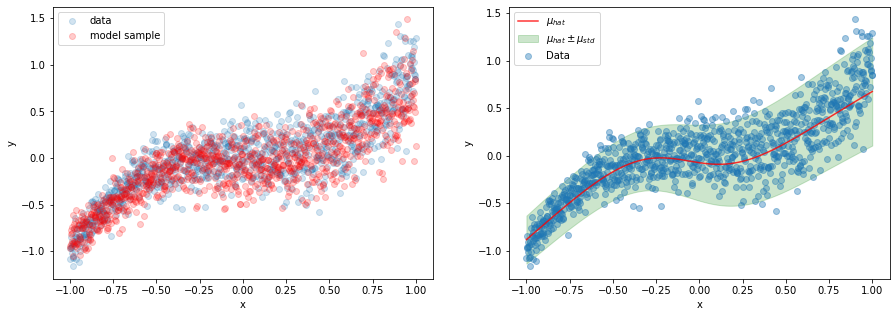

In [22]:
y_model = model(X_train)
y_sample = y_model.sample()
y_hat = y_model.mean()
y_std = y_model.stddev()
plot_model(X_train, y_train, y_sample, y_hat, y_std)